**1 — Importing of Essential Libraries**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,r2_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pickle

sex: 1 for female and 2 for male.<br>
age: of the patient.<br>
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.<br>
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.<br>
pneumonia: whether the patient already have air sacs inflammation or not.<br>
pregnancy: whether the patient is pregnant or not.<br>
diabetes: whether the patient has diabetes or not.<br>
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.<br>
asthma: whether the patient has asthma or not.<br>
inmsupr: whether the patient is immunosuppressed or not.<br>
hypertension: whether the patient has hypertension or not.<br>
cardiovascular: whether the patient has heart or blood vessels related disease.<br>
renal chronic: whether the patient has chronic renal disease or not.<br>
other disease: whether the patient has other disease or not.<br>
obesity: whether the patient is obese or not.<br>
tobacco: whether the patient is a tobacco user.<br>
usmr: Indicates whether the patient treated medical units of the first, second or third level.<br>
medical unit: type of institution of the National Health System that provided the care.<br>
intubed: whether the patient was connected to the ventilator.<br>
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.<br>
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

**2 — Importing of the Data Set**

In [2]:
df = pd.read_csv('Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


**3 - Find Unique Number In Every Columns**

In [5]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

**4 - Finding The Percent Of Missing Data**

In [6]:
print('Percentage of missing values')
for i in df.columns:
  print('{:<20} => {:>10.2f}%'.format(i,len(df[(df[i]==98) | (df[i]==99) | (df[i]==97)])/len(df)*100))
  #print(f'{i} => {len(df[(df[i]==98) | (df[i]==99) | (df[i]==97)])/len(df)*100}')

Percentage of missing values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.03%
PREGNANT             =>      50.28%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%


In [7]:
for i in df.columns:
  print(df[i].value_counts())
  print('__'*50)

2    662903
1    385672
Name: USMER, dtype: int64
____________________________________________________________________________________________________
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
____________________________________________________________________________________________________
1    525064
2    523511
Name: SEX, dtype: int64
____________________________________________________________________________________________________
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
____________________________________________________________________________________________________
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DA

INTUBED, PREGNANT, ICU :<br> have many missing values, indicated by 97,99
other columns have smaller missing values, indicated by 98<br>
1-3 : the patient was diagnosed with covid in different degrees<br>
4-7 : the patient is not a carrier of covid or that the test is inconclusive

In [8]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

**5 - Adjust The Missing Data That Is In Multiple Category to Convert It Into Two Category**

In [9]:
df_col = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for i in df_col:
  df = df[(df[i]==1)|(df[i]==2)]

**6 - Convet The date Into Numerical Value If Death then it will be 0 and Alive means 1**

In [10]:
df['ALIVE'] = [1 if i=="9999-99-99" else 0 for i in df['DATE_DIED']]

In [11]:
df.ALIVE.value_counts()

1    950438
0     74714
Name: ALIVE, dtype: int64

In [12]:
df.drop(columns=['INTUBED','ICU','DATE_DIED'],inplace=True)

In [13]:
df.groupby('SEX')['PREGNANT'].value_counts()

SEX  PREGNANT
1    2           502200
     1             7841
     98            3175
2    97          511936
Name: PREGNANT, dtype: int64

**7 - Adjust the missing data that is inforn of multiple category and converted it into two category**

In [14]:
df['PREGNANT']=df['PREGNANT'].replace(97,2)
df['PREGNANT']=df['PREGNANT'].replace(98,2)

**8 - Find Inficted Values that is less than 4**

In [15]:
df["INFECTED"]=[1 if each<4 else 0 for each in df["CLASIFFICATION_FINAL"]]
df.drop("CLASIFFICATION_FINAL",axis=1,inplace=True)

In [16]:
df.nunique()

USMER               2
MEDICAL_UNIT       13
SEX                 2
PATIENT_TYPE        2
PNEUMONIA           2
AGE               121
PREGNANT            2
DIABETES            2
COPD                2
ASTHMA              2
INMSUPR             2
HIPERTENSION        2
OTHER_DISEASE       2
CARDIOVASCULAR      2
OBESITY             2
RENAL_CHRONIC       2
TOBACCO             2
ALIVE               2
INFECTED            2
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   USMER           1025152 non-null  int64
 1   MEDICAL_UNIT    1025152 non-null  int64
 2   SEX             1025152 non-null  int64
 3   PATIENT_TYPE    1025152 non-null  int64
 4   PNEUMONIA       1025152 non-null  int64
 5   AGE             1025152 non-null  int64
 6   PREGNANT        1025152 non-null  int64
 7   DIABETES        1025152 non-null  int64
 8   COPD            1025152 non-null  int64
 9   ASTHMA          1025152 non-null  int64
 10  INMSUPR         1025152 non-null  int64
 11  HIPERTENSION    1025152 non-null  int64
 12  OTHER_DISEASE   1025152 non-null  int64
 13  CARDIOVASCULAR  1025152 non-null  int64
 14  OBESITY         1025152 non-null  int64
 15  RENAL_CHRONIC   1025152 non-null  int64
 16  TOBACCO         1025152 non-null  int64
 17  ALIVE           1025152 non

#Data Visualization, EDA

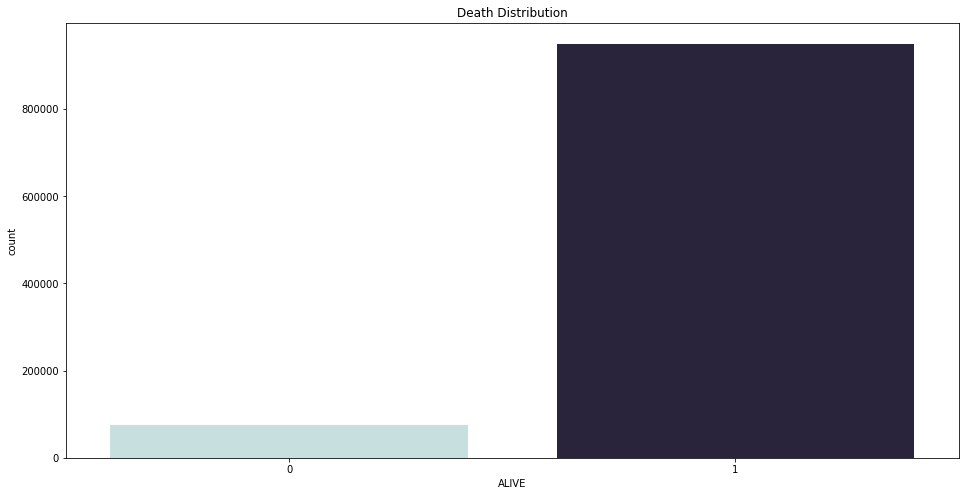

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(x='ALIVE',data=df,palette="ch:start=.2,rot=-.3")
plt.title('Death Distribution')
plt.show()

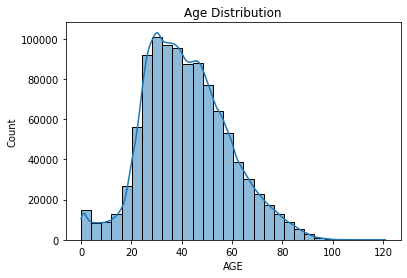

In [19]:
plt.title('Age Distribution')
sns.histplot(x='AGE',data=df,bins=30,kde=True)
plt.show()

Text(0.5, 1.0, 'Age-Alive-Sex Distribution')

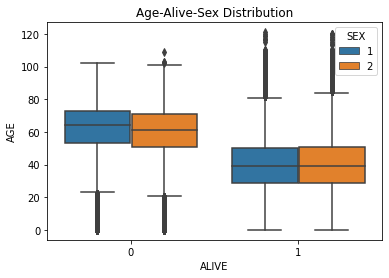

In [20]:
sns.boxplot(x='ALIVE',y='AGE',hue='SEX',data=df)
plt.title('Age-Alive-Sex Distribution')

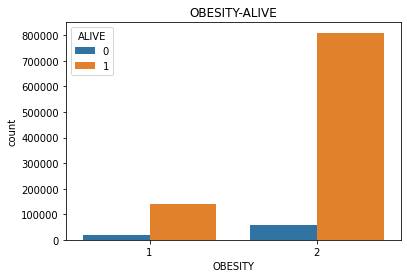

In [22]:
sns.countplot(x='OBESITY',hue='ALIVE',data=df)
plt.title('OBESITY-ALIVE')
plt.show()

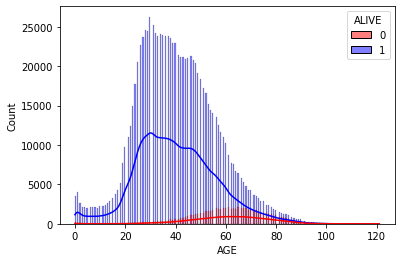

In [24]:
sns.histplot(x=df['AGE'],hue=df['ALIVE'],legend=True,palette=['red','blue'],kde=True)

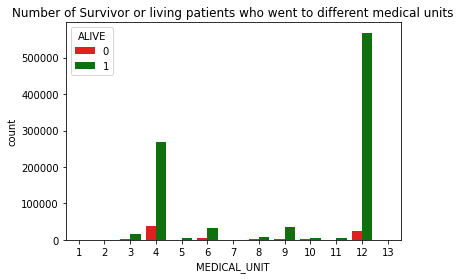

In [23]:
sns.countplot(x=df.MEDICAL_UNIT,hue=df.ALIVE,palette=["red","green"]).set(title="Number of Survivor or living patients who went to different medical units")
plt.show()

[Text(0.5, 1.0, 'survival and Alive rates of infected patients')]

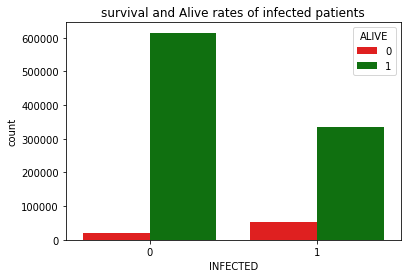

In [25]:
sns.countplot(x=df.INFECTED,hue=df.ALIVE,palette=["red","green"]).set(title="survival and Alive rates of infected patients")

[Text(0.5, 1.0, 'Survival and death rates of people with and without pneumonia')]

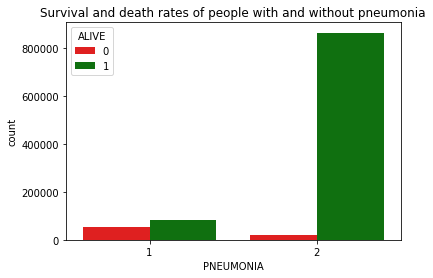

In [26]:
sns.countplot(x=df.PNEUMONIA,hue=df.ALIVE,palette=["red","green"]).set(title="Survival and death rates of people with and without pneumonia")

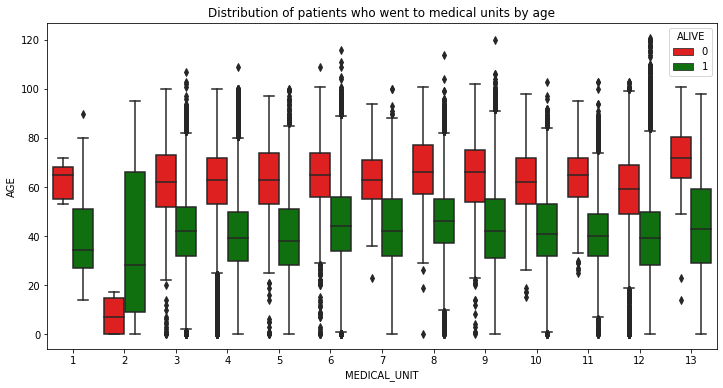

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.MEDICAL_UNIT,y=df.AGE,hue=df.ALIVE,palette=["red","green"]).set(title="Distribution of patients who went to medical units by age")
plt.show()

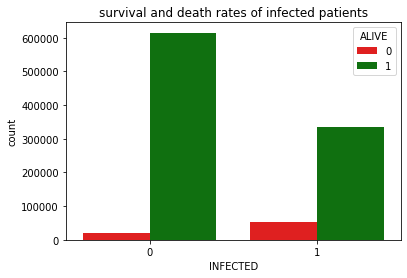

In [28]:
plt.figure()
sns.countplot(x=df.INFECTED,hue=df.ALIVE,palette=["red","green"]).set(title="survival and death rates of infected patients")
plt.show()

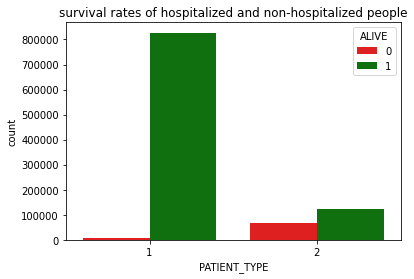

In [29]:
plt.figure()
sns.countplot(x=df.PATIENT_TYPE,hue=df.ALIVE,palette=["red","green"]).set(title="survival rates of hospitalized and non-hospitalized people")
plt.show()

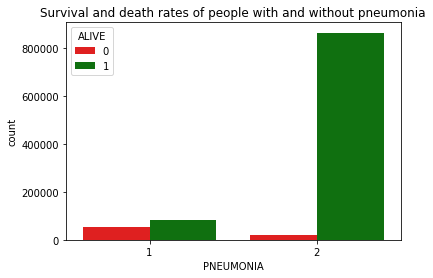

In [30]:
plt.figure()
sns.countplot(x=df.PNEUMONIA,hue=df.ALIVE,palette=["red","green"]).set(title="Survival and death rates of people with and without pneumonia")
plt.show()

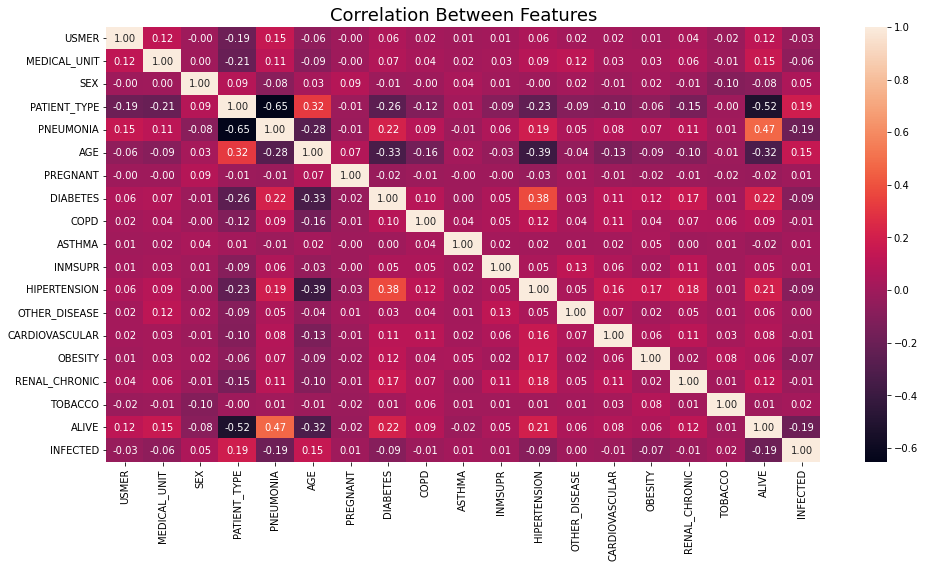

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)
plt.show()

**9 Feature Scaling the Data**

In [32]:
from sklearn.preprocessing import StandardScaler
df.AGE = StandardScaler().fit_transform(df.AGE.values.reshape(-1,1))
df.MEDICAL_UNIT=StandardScaler().fit_transform(df.MEDICAL_UNIT.values.reshape(-1,1))

**10 divide the data set into Dependent (y) and Independent (X) variable**

In [33]:
X = df.drop('ALIVE',1)
y = df.ALIVE

**Random Oversampling**

Random Oversampling includes selecting random examples from the minority class with replacement and supplementing the training data with multiple copies of this instance, hence it is possible that a single instance may be selected multiple times.

**Random Undersampling**

Random Undersampling is the opposite to Random Oversampling. This method seeks to randomly select and remove samples from the majority class, consequently reducing the number of examples in the majority class in the transformed data.

In [34]:
X_rand,y_rand=RandomUnderSampler(random_state=42).fit_resample(X, y)
X_train,X_test,y_train,y_test = train_test_split(X_rand,y_rand,train_size=0.8,random_state=42)

In [36]:
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('y_train.shape =',y_train.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (119542, 18)
X_test.shape = (29886, 18)
y_train.shape = (119542,)
y_test.shape = (29886,)


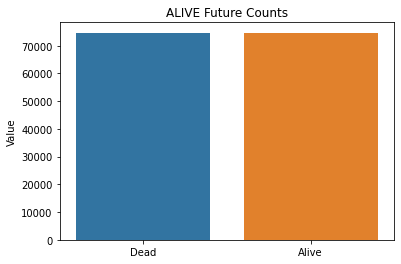

In [37]:
sns.barplot(y_rand.value_counts().index,y_rand.value_counts().values).set(title="ALIVE Future Counts",xticklabels=(["Dead","Alive"]),ylabel="Value")
plt.show()

**A. Logistic Regression Model**

In [38]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X_train,y_train)
model1

LogisticRegression()

Accuracy of Logistic Regression => 0.9079836712842133
R2 -Score of Logistic Regression => 0.6319340900817225
F1 -Score of Logistic Regression => 0.9064052821455313
Classification Report of Logistic Regression =>
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     14924
           1       0.92      0.89      0.91     14962

    accuracy                           0.91     29886
   macro avg       0.91      0.91      0.91     29886
weighted avg       0.91      0.91      0.91     29886

HeatMap oF Confusion Matrix Logistic Regression


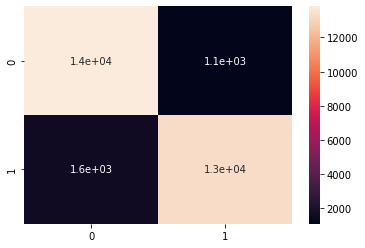

In [45]:
print('Accuracy of Logistic Regression =>',accuracy_score(y_test,model1.predict(X_test)))
print("R2 -Score of Logistic Regression =>",r2_score(y_test,model1.predict(X_test)))
print("F1 -Score of Logistic Regression =>",f1_score(y_test,model1.predict(X_test)))
print('Classification Report of Logistic Regression =>\n',(classification_report(y_test,model1.predict(X_test))))
print('HeatMap oF Confusion Matrix Logistic Regression')
sns.heatmap(confusion_matrix(y_test,model1.predict(X_test)),annot=True)
plt.show()

**B. DecisionTreeClassifier Model**

In [39]:
model2 = DecisionTreeClassifier(criterion='entropy',random_state=0).fit(X_train,y_train)
model2

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy of  Decision Tree Classifier => 0.8882085257311115
R2 -Score of Decision Tree Classifier => 0.5528333799865581
F1 -Score of Decision Tree Classifier=> 0.8855155398691018
Classification Report of Decision Tree Classifier=>
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     14924
           1       0.91      0.86      0.89     14962

    accuracy                           0.89     29886
   macro avg       0.89      0.89      0.89     29886
weighted avg       0.89      0.89      0.89     29886

HeatMap oF Confusion Matrix Decision Tree Classifier


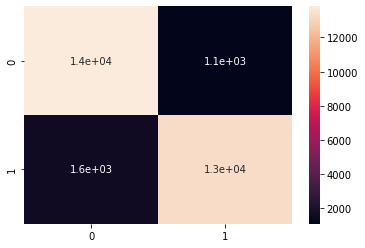

In [40]:
print('Accuracy of  Decision Tree Classifier =>',accuracy_score(y_test,model2.predict(X_test)))
print("R2 -Score of Decision Tree Classifier =>",r2_score(y_test,model2.predict(X_test)))
print("F1 -Score of Decision Tree Classifier=>",f1_score(y_test,model2.predict(X_test)))
print('Classification Report of Decision Tree Classifier=>\n',(classification_report(y_test,model2.predict(X_test))))
print('HeatMap oF Confusion Matrix Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test,model1.predict(X_test)),annot=True)
plt.show()

**C. RandomForest Regressor Model**

In [41]:
model3 = RandomForestRegressor(n_estimators=250,random_state=0).fit(X_train,y_train)
model3

RandomForestRegressor(n_estimators=250, random_state=0)

In [43]:
y_pred = model3.predict(X_test)
y_pred = np.rint(y_pred)

Accuracy of  Random Forest Regressor => 0.901659639965201
R2 -Score of Random Forest Regressor => 0.6066379239091573
F1 -Score of Random Forest Regressor=> 0.8988609380914692
Classification Report of Random Forest Regressor=>
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     14924
           1       0.93      0.87      0.90     14962

    accuracy                           0.90     29886
   macro avg       0.90      0.90      0.90     29886
weighted avg       0.90      0.90      0.90     29886

HeatMap oF Confusion Matrix Random Forest Regressor


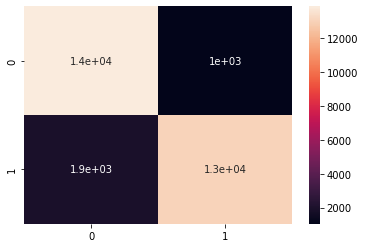

In [44]:
print('Accuracy of  Random Forest Regressor =>',accuracy_score(y_test,y_pred))
print("R2 -Score of Random Forest Regressor =>",r2_score(y_test,y_pred))
print("F1 -Score of Random Forest Regressor=>",f1_score(y_test,y_pred))
print('Classification Report of Random Forest Regressor=>\n',(classification_report(y_test,y_pred)))
print('HeatMap oF Confusion Matrix Random Forest Regressor')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

**D. RandomForest Classifier Model**

In [46]:
model4 = RandomForestClassifier(n_estimators=180,criterion='entropy',random_state=0).fit(X_train,y_train)
model4

RandomForestClassifier(criterion='entropy', n_estimators=180, random_state=0)

Accuracy of Random Forest Classifier => 0.9029980592919762
R2 -Score of Random Forest Classifier => 0.611991609871605
F1 -Score of Random Forest Classifier=> 0.9001618624513551
Classification Report of Random Forest Classifier=>
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     14924
           1       0.93      0.87      0.90     14962

    accuracy                           0.90     29886
   macro avg       0.90      0.90      0.90     29886
weighted avg       0.90      0.90      0.90     29886

HeatMap oF Confusion Matrix Random Forest Classifier


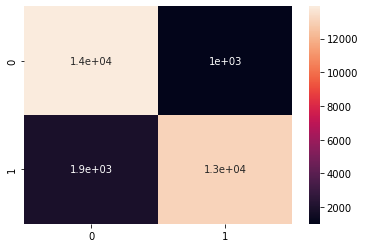

In [47]:
print('Accuracy of Random Forest Classifier =>',accuracy_score(y_test,model4.predict(X_test)))
print("R2 -Score of Random Forest Classifier =>",r2_score(y_test,model4.predict(X_test)))
print("F1 -Score of Random Forest Classifier=>",f1_score(y_test,model4.predict(X_test)))
print('Classification Report of Random Forest Classifier=>\n',(classification_report(y_test,model4.predict(X_test))))
print('HeatMap oF Confusion Matrix Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test,model4.predict(X_test)),annot=True)
plt.show()

**E. KNeighbors Classifier(KNN) Model**

In [48]:
model5 = KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2).fit(X_train,y_train)
model5

KNeighborsClassifier(n_neighbors=8)

Accuracy of KNeighbors Classifier => 0.9125008365120792
R2 -Score of KNeighbors Classifier => 0.6500027802049835
F1 -Score of KNeighbors Classifier=> 0.9083902609914172
Classification Report of KNeighbors Classifier=>
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     14924
           1       0.95      0.87      0.91     14962

    accuracy                           0.91     29886
   macro avg       0.92      0.91      0.91     29886
weighted avg       0.92      0.91      0.91     29886

HeatMap oF Confusion Matrix KNeighbors Classifier


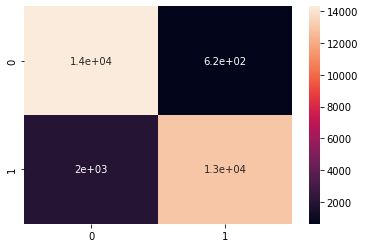

In [49]:
print('Accuracy of KNeighbors Classifier =>',accuracy_score(y_test,model5.predict(X_test)))
print("R2 -Score of KNeighbors Classifier =>",r2_score(y_test,model5.predict(X_test)))
print("F1 -Score of KNeighbors Classifier=>",f1_score(y_test,model5.predict(X_test)))
print('Classification Report of KNeighbors Classifier=>\n',(classification_report(y_test,model5.predict(X_test))))
print('HeatMap oF Confusion Matrix KNeighbors Classifier')
sns.heatmap(confusion_matrix(y_test,model5.predict(X_test)),annot=True)
plt.show()

**Saving and Loading the Model**

After completion of the Machine Learning project, the ML model need to deploy in an application. To deploy the ML model , we need to save it first. To save the Machine Learning project we can use the pickle package.Here I have used pickle package of python to load and save the model.The pickle or joblib package saves the model to that address, later on to deploy the model we can simply load the model through the pickle file.

In [50]:
pickle.dump(model5,open('COVID_19-Prediction_of_Death.pickle','wb'))
Covid19_Prediction_model = pickle.load(open('COVID_19-Prediction_of_Death.pickle','rb'))

In [51]:
Covid19_Prediction_model.predict(X[0:50])

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1])

**Conclusion:**

After training all the algorithms , we found that Random Forest Regression, KNN, Decision Tree Classification , Random Forest Classification Model have high accuracy. From them we choose the Random Forest Classification Model as it gives the highest accuracy.

I hope you understood this Machine Learning Project and enjoyed it.I hope my efforts will be valuable for saving the life of COVID19 Patients.I hope more improvised model comes up with more accuracy and help us to tackle this problem.